# El modelo de Ising

El modelo de Ising es un modelo simplificado de un imán tipo hierro.

Consideremos que hay una red periódica de átomos, y que cada átomo tiene un "espín" (dipolo magnético, o "imancito") que puede apuntar hacia arriba o hacia abajo. Los dipolos *interactúan* con sus vecinos: en el caso ferromagnético, hay una tendencia a que *se alineen* con sus vecinos. 

[Esto se debe a la llamada *interacción de intercambio*, el cual es un fenómeno cuántico complicado; véase, por ejemplo, el libro *The Theory of Magnetism Made Simple* de Mattis.  No es, de hecho, ¡nada "simple"...!]

Inicialmente trabajeremos con una red cuadrada en dos dimensiones, de tamaño finito $L \times L$. Llamaremos $N := L^2$ el número de espines.

Denotaremos el espín en el lugar $i$ por $\sigma_i \in \{+1, -1\}$, y por una configuración completa por $\pmb {\sigma} := (\sigma_{i})_{i=1}^{N}$. [Nótese que estamos pensando aquí que cada sitio tiene una etiqueta que es un entero. También será útil pensar que la etiqueta es de la forma $(i,j)$.]

Denotaremos por $\Omega_{N}$ el conjunto de todas las configuraciones posibles, es decir, el *espacio de configuraciones*.

[1] ¿Cuál es la cardinalidad $|\Omega_N|$, es decir, cuántas configuraciones hay?

[2] Escribe una función que genere una configuración "aleatoria". ¿Qué tipo de aleatoriedad es?

[3] La *magnetización* de una configuración $\pmb \sigma$ se define como $M(\pmb \sigma) := \sum_i \sigma_i$. 

(i) Escribe una función para calcular la magnetización de una configuración.

(ii) ¿Cuáles son los valores posibles de la magnetización para un sistema de tamaño $N$?

(iii) Genera bastantes configuraciones al azar y calcula la magnetización de cada una.

(iv) ¿Cuáles valores realmente toma? Dibuja un histograma de los valores de la magnetización que obtienes para un sistema grande. ¿Qué observas?

In [1]:
using PyPlot

INFO: Loading help data...


## 1)
$\vert\Omega_N\vert=2^N=2^{L^2}$

## 2)

In [2]:
function spin_config_2D(L::Int)
    M=zeros(Int,L,L)
    
    for i in 1:length(M)
        if rand()<0.5
            M[i]=1
        else
            M[i]=-1
        end
    end
    
    return M
end;

Es una aleatoriedad binaria.

In [3]:
function spin_seer(L::Int)
    S=spin_config_2D

LoadError: syntax: incomplete: "function" at In[3]:1 requires end
while loading In[3], in expression starting on line 1

In [4]:
S=spin_config_2D(

LoadError: syntax: incomplete: premature end of input
while loading In[4], in expression starting on line 1

## 3) 

### $i)$ 

In [5]:
function magnetization(M)
    
    return sum(M)
    
end;

### $ii)$ 

Para un sistema de tamaño $N$, tenemos entonces que $\vec{M}=\sum_i\sigma_i$, por lo cual $-N\leq M \leq N$.

### $iii)$

In [6]:
L=10
M=Int[]
N=100_000
sizehint(M,N)

for i in 1:N
    push!(M,magnetization(spin_config_2D(L)))
end

In [7]:
function histograma(X::Array,divisiones::Int)
    #esta función toma como entrada un arreglo y un número de divisiones, y a la salida escupe el número de elementos que
    #había en cacda uno de los intervalos (las divisiones son homogéneas)
    #además escupe un arreglo que tiene un elemento en la mitad de cada división para poder graficar
    
    Xmin=minimum(X)
    Xmax=maximum(X)
    intervalo=Xmax-Xmin
    INTERVALOS=[Xmin:intervalo/divisiones:Xmax]
    contadora=zeros(Int,divisiones)
    
    for i in 1:divisiones-1
        contadora[i]=count(x-> INTERVALOS[i]<=x<INTERVALOS[i+1],X)
    end
    
    contadora[end]=count(x-> INTERVALOS[end-1]<=x<=INTERVALOS[end],X)
    Plotting_itvls=zeros(divisiones)
    
    for i in 1:divisiones
        Plotting_itvls[i]=(INTERVALOS[i+1]+INTERVALOS[i])/2
    end
    
    return contadora,Plotting_itvls
end;

In [8]:
function normal_histo(X::Array,divisiones::Int)
    #hace lo mismo que el histograma pero de forma normalizada
    
    H,INTERVALOS=histograma(X,divisiones)
    TOTAL=sum(H)
    Hnorm=H/TOTAL
    return Hnorm,INTERVALOS
end;

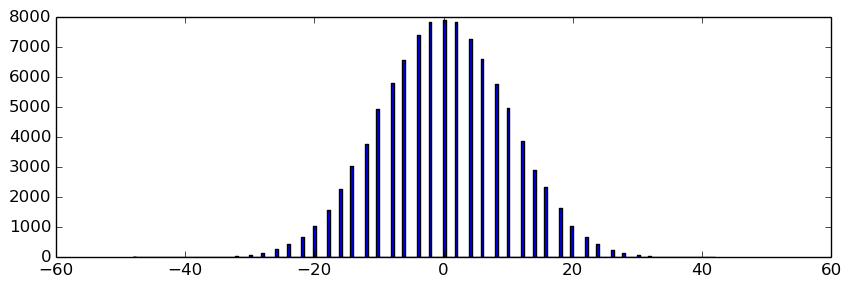

In [9]:
figure(figsize=(10,3))
plt.hist(M,201);

In [10]:
MM,INTS=normal_histo(M,201);

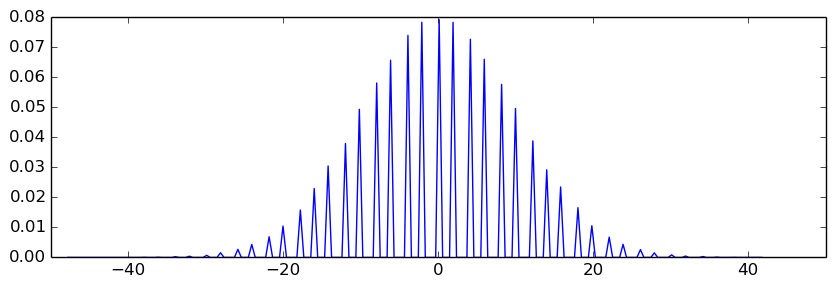

In [11]:
figure(figsize=(10,3))
plot(INTS,MM);

[4] Podemos llevar a cabo un proceso estocástico en el espacio $\Omega$. Un paso es como sigue:

1. Escoge un espín al azar.

2. Cambiarlo al valor opuesto. (Esto se suele llamar un "flip" = "darle la vuelta".)

(i) ¿Qué tipo de proceso es? ¿A qué te recuerda?

(ii) Impleméntalo, partiendo de una configuración aleatoria. 

(iii) Dibuja cómo cambia la magnetización en el tiempo. ¿Qué observas?  

(iv) ¿Cuál es el *promedio temporal* (promedio *en el tiempo*) de la magnetización?



In [12]:
function int_rand(N::Int)
    
    return floor(N*rand()+1)
    
end;

In [13]:
function spin_flip!(M,N=lenght(N))
    
    M[int_rand(N)]*=-1
    return
    
end;

In [14]:
function time_flipper(L::Int,steps::Int)
    
    S=spin_config_2D(L)
    Mag=[magnetization(S)]
    sizehint(Mag,steps+1)
    N=L*L
    
    for t in 1:steps
        spin_flip!(S,N)
        push!(Mag,magnetization(S))
    end
    
    return Mag

end;

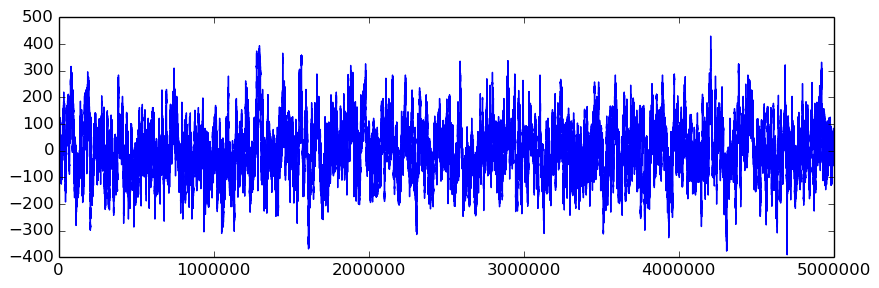

In [15]:
figure(figsize=(10,3))
MAG=time_flipper(100,5_000_000)
plot(MAG);

In [16]:
mean(MAG)

0.07148878570224286

## La energía

Hasta ahora, no hemos modelado las *interacciones* entre los espines, que es lo que hace interesante y rico el modelo. Para ello, tomaremos en cuenta que los espines "quieren" alinearse con sus vecinos, es decir, que la *energía* será *menor* cuando dos vecinos estén alineados.

[5] Considera un par de espines vecinos $\sigma_i$ y $\sigma_j$. 

(i) Escribe una tabla de los valores posibles de los dos espines y las energías correspondientes que asignaremos, si a un par de vecinos iguales le asignamos la energía $-J$ y a un par de vecinos desiguales la energía $J$.

(ii) Escribe esta energía como una fórmula en términos de los valores $\sigma_i$ y $\sigma_j$. 

(iii) Así, escribe una fórmula para la energía $E(\pmb \sigma)$ de una configuración $\pmb \sigma$.

[6] Implementa una función que toma una configuración $\pmb \sigma$ y regresa la energía correspondiente, $E(\pmb \sigma)$. 

In [90]:
function periodic_energy(S,N=length(S),L=int(sqrt(N)),J=1)
    
    E=0
    
    for i in 1:L, j in 1:L
        E+=S[i,j]*(S[mod1(i-1,L),j]+S[mod1(i+1,L),j]+S[i,mod1(j-1,L)]+S[i,mod1(j+1,L)])
    end
    
    return int(-E/2)
    
end;

In [108]:
@time S=spin_config_2D(100);

elapsed time: 0.000133164 seconds (80128 bytes allocated)


In [109]:
@time periodic_energy(S)

elapsed time: 0.000951688 seconds (80 bytes allocated)


128

In [117]:
E=Int[]
MC=10_000
L=100
sizehint(E,MC)

@time for i in 1:MC
    push!(E,periodic_energy(spin_config_2D(L)))
end    

elapsed time: 11.176549701 seconds (801103752 bytes allocated, 4.94% gc time)


In [127]:
@time EE,ITVLS=normal_histo(E,4001);

elapsed time: 5.172616047 seconds (1206596248 bytes allocated, 17.95% gc time)


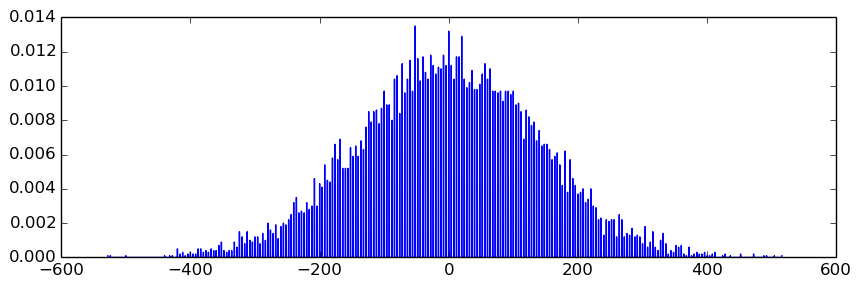

In [129]:
figure(figsize=(10,3))
plot(ITVLS,EE);

[7] En la pregunta [6], hubo que escoger qué hacer en las fronteras e la configuración finita. Enumera unas posibilidades de cómo tratar las fronteras e impleméntalas.

[8] Repite la pregunta [4] para la energía, en lugar de la magnetización.

¿A qué temperatura [concepto que aún no hemos introducido] correspondaría esta dinámica?

In [134]:
function energy_flipper(L::Int,steps::Int)
    
    S=spin_config_2D(L)
    E=[periodic_energy(S)]
    sizehint(E,steps+1)
    N=L*L
    
    for t in 1:steps
        spin_flip!(S,N)
        push!(E,periodic_energy(S))
    end
    
    return E

end;

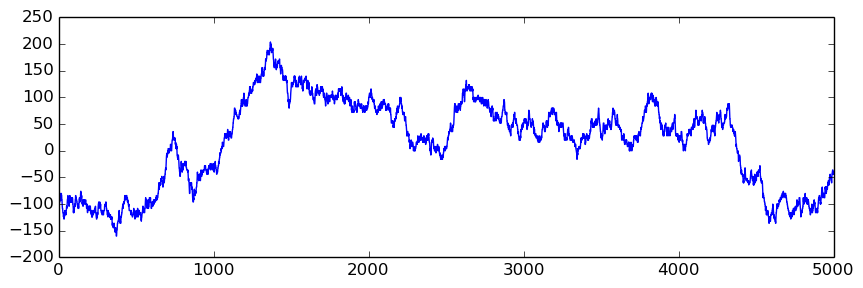

In [135]:
figure(figsize=(10,3))
EN=energy_flipper(100,5_000)
plot(EN);

[9] Encuentra la energía mínima y la máxima.